# Titanic Tabulation
Write a short intro about the titanic here and what you will be analzying (1-2 sentences)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_df = pd.read_csv("titanic_passengers.csv")

## How many survivors are there?

1 = Survived
0 = Did not survive
Survived
0    549
1    342
Name: count, dtype: int64
Overall Survival Rate: 38.38 %


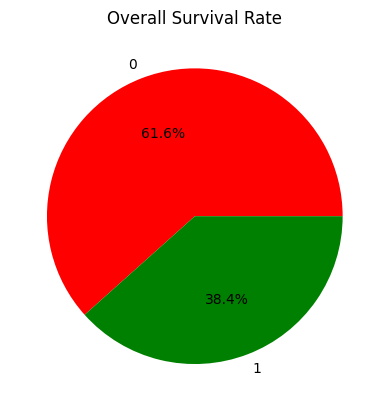

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic_passengers.csv")

titanic_df.isnull().sum()
print("1 = Survived")
print("0 = Did not survive")

survived_counts = titanic_df["Survived"].value_counts()
print(survived_counts)

survival_rate = titanic_df['Survived'].mean()
print('Overall Survival Rate:', round(survival_rate * 100, 2), '%')

colors = ['red', 'green']

plt.pie(survived_counts.values, labels=survived_counts.index, autopct="%1.1f%%", colors=colors, textprops={'color': 'black'})
plt.title("Overall Survival Rate")
plt.show()



The pie chart shows the survival rate of Titanic passengers, splitting them into survivors (1) and non-survivors (0). Survivors are shown in blue, while non-survivors are in red. From the chart, it's clear that far more passengers did not survive the disaster. The survival rate is about **(survival rate value)%**, which shows just how many people tragically didn’t make it. The chart gives a simple, easy-to-understand view of the data, making the survival difference very clear.

##  How many passengers were male?

Number of male passengers: 577
Number of female passengers: 314


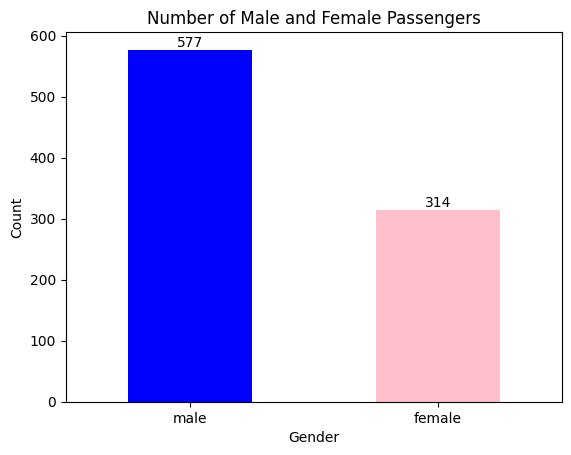

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic_passengers.csv")

gender_counts = titanic_df["Sex"].value_counts()

print("Number of male passengers:", gender_counts.get("male", 0))
print("Number of female passengers:", gender_counts.get("female", 0))

ax = gender_counts.plot(kind='bar', color=['blue', 'pink'])

for i, v in enumerate(gender_counts):
    ax.text(i, v + 5, str(v), ha='center', color='black')

plt.title("Number of Male and Female Passengers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


The bar chart shows how many male and female passengers were on the Titanic, with blue representing the males and pink representing the females. From the chart, we can see that there were more male passengers than female passengers. This might be because, back in the early 1900s, men usually traveled more on their own or for business, while women and children often traveled with family or in smaller groups.

## Did the passenger class affect survival rates?

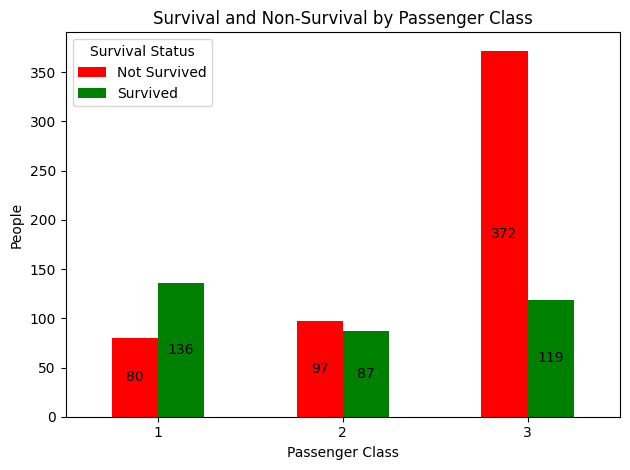

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic_passengers.csv")

class_survival_counts = titanic_df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

ax = class_survival_counts.plot(kind='bar', stacked=False, color=['red', 'green'])

plt.title('Survival and Non-Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('People')
plt.xticks(rotation=0)

plt.legend(["Not Survived", "Survived"], title="Survival Status")


for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.tight_layout()  
plt.show()

The graph illustrates the survival rates across different passenger classes on the Titanic. First-class passengers had the highest survival rate, with 136 survivors compared to 80 casualties. Second-class passengers showed a more balanced outcome, with 87 survivors and 97 casualties. Third-class passengers suffered the highest mortality rate, with only 119 survivors against 63372 casualties. This data suggests a strong correlation between passenger class and survival probability, with higher-class passengers having a significantly better chance of survival. The disparity is particularly stark for third-class passengers, who had more than twice as many casualties as survivors. These findings align with historical accounts of the Titanic disaster, which often note that first-class passengers had priority access to lifeboats and were located closer to the ship's upper decks, contributing to their higher survival rates1

##    Did age groups affect survival rates?

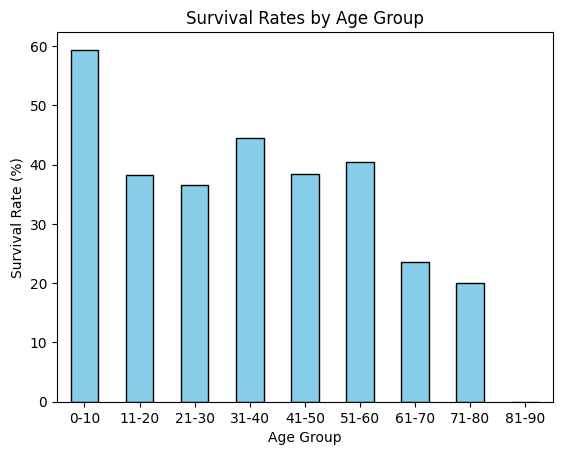

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic_passengers.csv")

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=age_bins, labels=age_labels)

survival_rates_by_age_group = titanic_df.groupby('AgeGroup', observed=False)['Survived'].mean() * 100

survival_rates_by_age_group.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)

plt.show()

The bar graph shows how the survival rates of Titanic passengers changed by age group. The youngest age groups, like 0-10 and 11-20, had the highest survival rates, meaning kids and young adults were more likely to survive. As the age groups got older, the survival rates went down, with the oldest age groups, like 71-80 and 81-90, having the lowest survival chances. This could be because children and younger people were given more priority during the evacuation, while older passengers might have faced more difficulties in surviving. The graph makes it clear that age had a big impact on who survived the Titanic disaster.

## How did age and gender affect their ticket price?

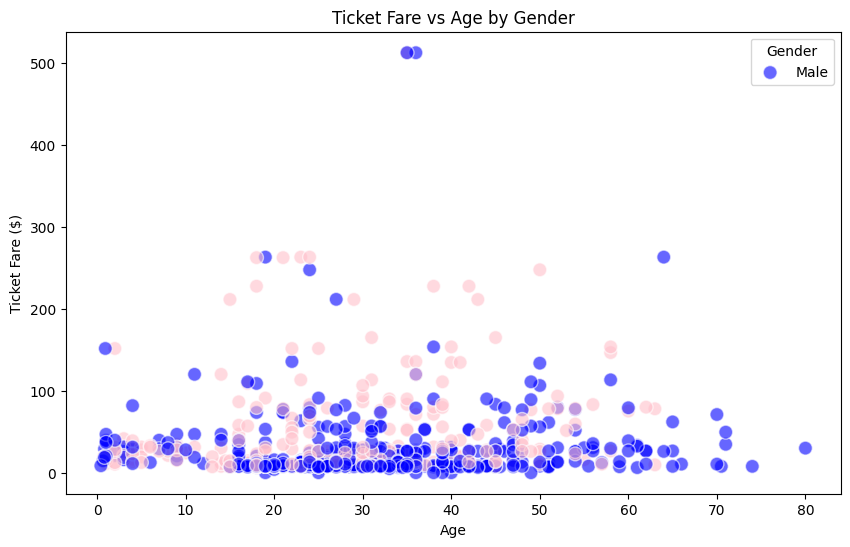

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic_passengers.csv")

plt.figure(figsize=(10,6))

colors = {'male': 'blue', 'female': 'pink'}

male_data = titanic_df[titanic_df['Sex'] == 'male']
female_data = titanic_df[titanic_df['Sex'] == 'female']

plt.scatter(male_data['Age'], male_data['Fare'], 
            c='blue', alpha=0.6, edgecolors='w', s=100, label='Male')

plt.scatter(female_data['Age'], female_data['Fare'], 
            c='pink', alpha=0.6, edgecolors='w', s=100, label='Female')

plt.title('Ticket Fare vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Ticket Fare ($)')

plt.legend(title='Gender')

plt.show()


The scatter plot shows the relationship between ticket fare and age for male and female passengers on the Titanic. Each point represents a passenger, with age on the x-axis and the fare they paid on the y-axis. The colors of the points indicate the gender of the passengers, with blue representing males and pink representing females. From the graph, we can see that most passengers paid lower fares, especially those who were younger. However, there are a few older passengers who paid much higher fares, suggesting that they might have been in higher classes. There seems to be no clear trend that one gender paid more than the other overall, but the plot shows a mix of ages and fare amounts across both genders.